In [14]:
import pandas as pd
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('tokenized_data.csv')

In [8]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['tokens'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 225361 unique tokens.


In [11]:
X = tokenizer.texts_to_sequences(df['tokens'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (975000, 250)


In [12]:
Y = pd.get_dummies(df['subreddit']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (975000, 39)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 50)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(780000, 250) (780000, 39)
(195000, 250) (195000, 39)


In [18]:
# Padding the data samples to a maximum content length in words
max_words = 250



# Building the CNN Model
model = Sequential()
model.add(Embedding(50000, 32, input_length=max_words)) 

model.add(Conv1D(32, 3, padding='same', activation='relu'))

#maxplooing layer
model.add(MaxPooling1D())
model.add(Flatten())

#2 dense layer with relu activation function
model.add(Dense(250, activation='relu'))
model.add(Dense(39, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 32)           1600000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 250, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 125, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               1000250   
_________________________________________________________________
dense_3 (Dense)              (None, 39)                9789      
Total params: 2,613,143
Trainable params: 2,613,143
Non-trainable params: 0
____________________________________________

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 50)

model.fit(X_train, 
          Y_train, 
          epochs = 20, 
          batch_size= 256, 
          verbose=2)


scores = model.evaluate(X_test, Y_test, verbose=0)

#get accuracy
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
3047/3047 - 136s - loss: 0.0953 - accuracy: 0.2575
Epoch 2/20
3047/3047 - 153s - loss: 0.0755 - accuracy: 0.4190
Epoch 3/20
3047/3047 - 150s - loss: 0.0708 - accuracy: 0.4569
Epoch 4/20
3047/3047 - 163s - loss: 0.0676 - accuracy: 0.4818
Epoch 5/20
3047/3047 - 161s - loss: 0.0650 - accuracy: 0.5038
Epoch 6/20
3047/3047 - 166s - loss: 0.0627 - accuracy: 0.5231
Epoch 7/20
3047/3047 - 156s - loss: 0.0606 - accuracy: 0.5409
Epoch 8/20
3047/3047 - 156s - loss: 0.0586 - accuracy: 0.5577
Epoch 9/20
3047/3047 - 157s - loss: 0.0570 - accuracy: 0.5723
Epoch 10/20
3047/3047 - 157s - loss: 0.0554 - accuracy: 0.5852
Epoch 11/20
3047/3047 - 217s - loss: 0.0541 - accuracy: 0.5975
Epoch 12/20
3047/3047 - 152s - loss: 0.0529 - accuracy: 0.6075
Epoch 13/20
3047/3047 - 152s - loss: 0.0518 - accuracy: 0.6173
Epoch 14/20
3047/3047 - 156s - loss: 0.0508 - accuracy: 0.6261
Epoch 15/20
3047/3047 - 158s - loss: 0.0499 - accuracy: 0.6330
Epoch 16/20
3047/3047 - 155s - loss: 0.0491 - accuracy: 0.6396
E

### Heatmap for CNN model with 39 subreddits

<AxesSubplot:>

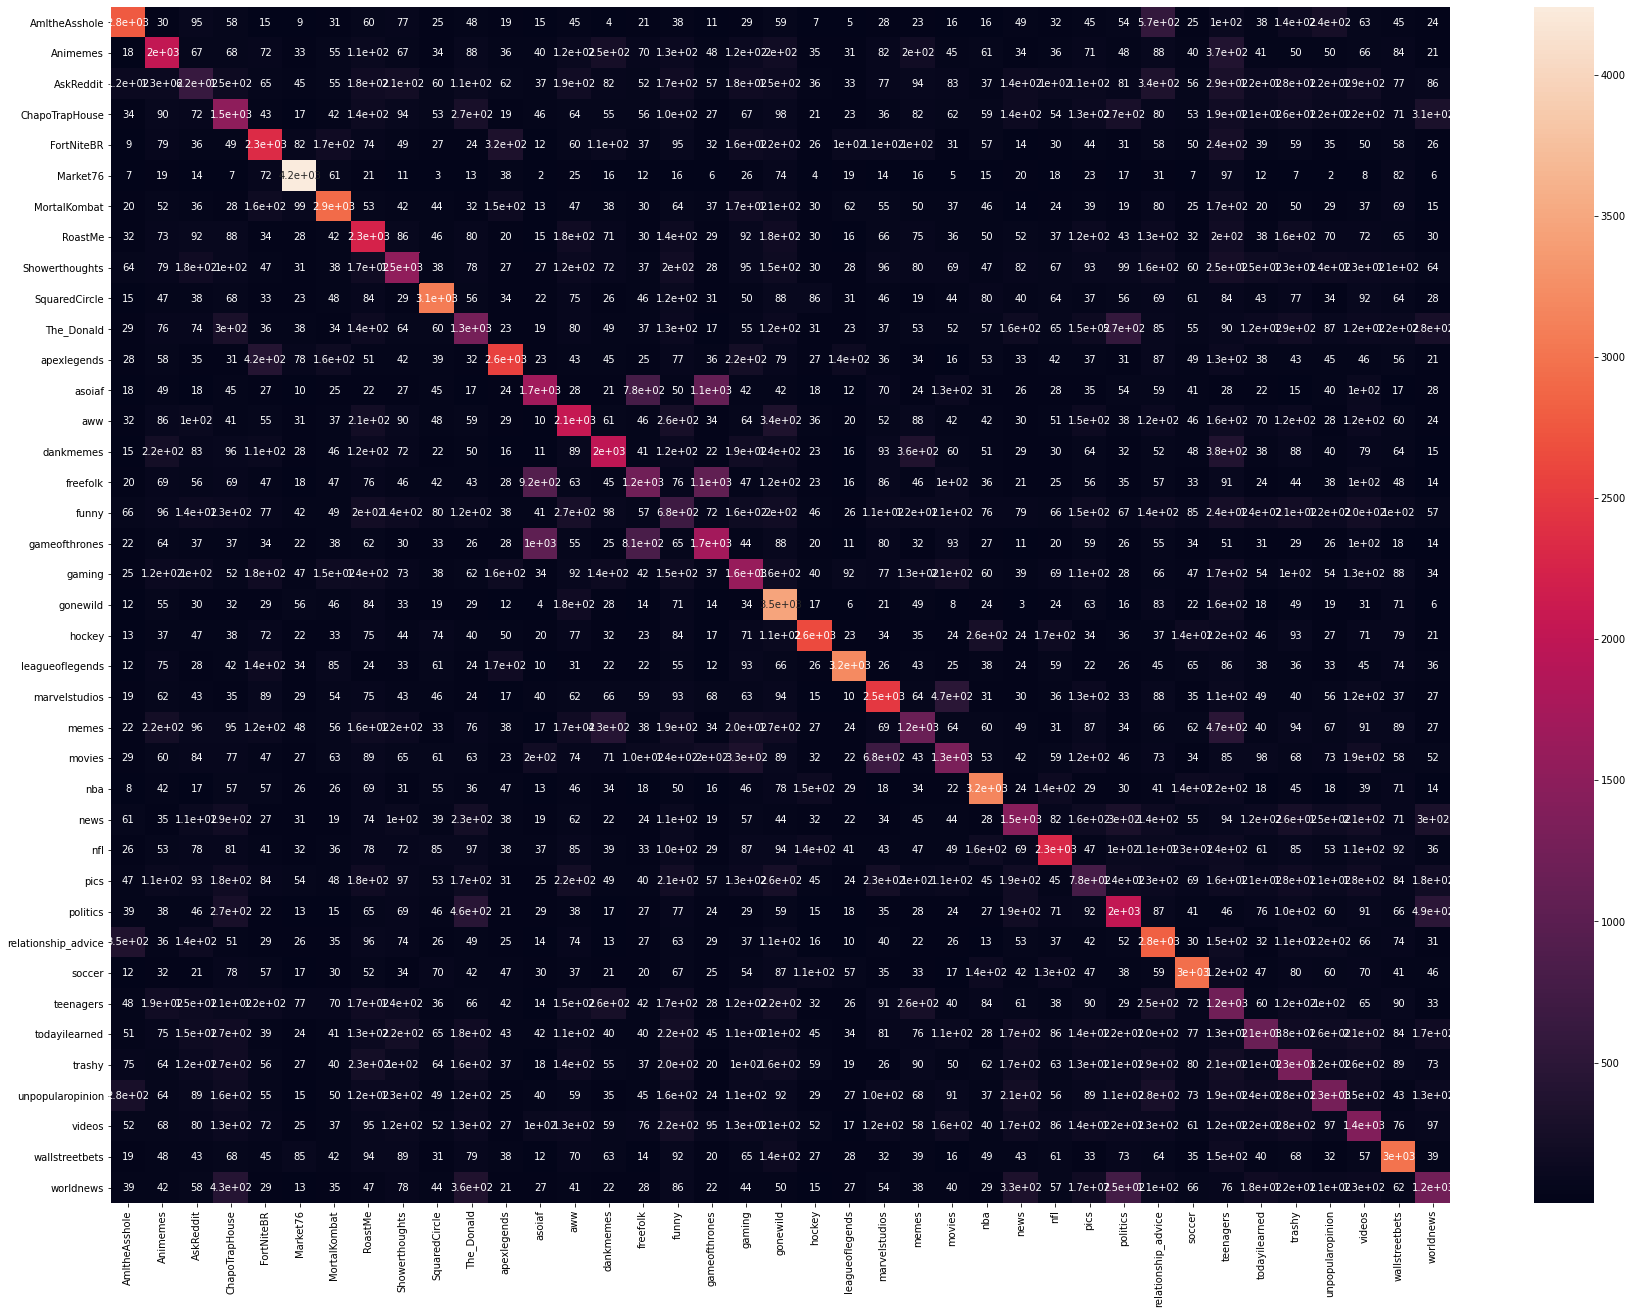

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
a = pd.get_dummies(df['subreddit'])
label = list(a.columns)
y_pred = model.predict(X_test)
matrix = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in label],
                  columns = [i for i in label])
plt.figure(figsize = (30,22))
sn.heatmap(df_cm, annot=True)

## Best 10 classified subreddit

In [22]:
top10 = ['Market76','gonewild','relationship_advice','soccer','leagueoflegends',
      'wallstreetbets','AmItheAsshole','nba','SquaredCircle','apexlegends'
     ]
df2 = df[df['subreddit'].isin(top10)]

MAX_NB_WORDS = 5000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df2['tokens'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = tokenizer.texts_to_sequences(df2['tokens'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

Y = pd.get_dummies(df2['subreddit']).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 50)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Found 79378 unique tokens.
(200000, 250) (200000, 10)
(50000, 250) (50000, 10)


In [23]:
# Padding the data samples to a maximum review length in words
max_words = 250
# Building the CNN Model
model = Sequential()
model.add(Embedding(5000, 32, input_length=max_words)) 
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 32)           1600000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 250, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 125, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               1000250   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 2,605,864
Trainable params: 2,605,864
Non-trainable params: 0
____________________________________________

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 50)

model.fit(X_train, Y_train, 
          epochs = 20, 
          batch_size= 256, verbose=2)


scores = model.evaluate(X_test, Y_test, verbose=0)

#get accuracy on test set
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
782/782 - 39s - loss: 0.2026 - accuracy: 0.5400
Epoch 2/20
782/782 - 40s - loss: 0.1109 - accuracy: 0.7726
Epoch 3/20
782/782 - 39s - loss: 0.0938 - accuracy: 0.8088
Epoch 4/20
782/782 - 38s - loss: 0.0831 - accuracy: 0.8317
Epoch 5/20
782/782 - 38s - loss: 0.0748 - accuracy: 0.8481
Epoch 6/20
782/782 - 39s - loss: 0.0680 - accuracy: 0.8628
Epoch 7/20
782/782 - 40s - loss: 0.0619 - accuracy: 0.8753
Epoch 8/20
782/782 - 42s - loss: 0.0567 - accuracy: 0.8864
Epoch 9/20
782/782 - 39s - loss: 0.0518 - accuracy: 0.8970
Epoch 10/20
782/782 - 39s - loss: 0.0476 - accuracy: 0.9059
Epoch 11/20
782/782 - 39s - loss: 0.0438 - accuracy: 0.9139
Epoch 12/20
782/782 - 40s - loss: 0.0404 - accuracy: 0.9210
Epoch 13/20
782/782 - 39s - loss: 0.0376 - accuracy: 0.9273
Epoch 14/20
782/782 - 40s - loss: 0.0349 - accuracy: 0.9328
Epoch 15/20
782/782 - 40s - loss: 0.0325 - accuracy: 0.9375
Epoch 16/20
782/782 - 41s - loss: 0.0305 - accuracy: 0.9416
Epoch 17/20
782/782 - 39s - loss: 0.0285 - accura

<AxesSubplot:>

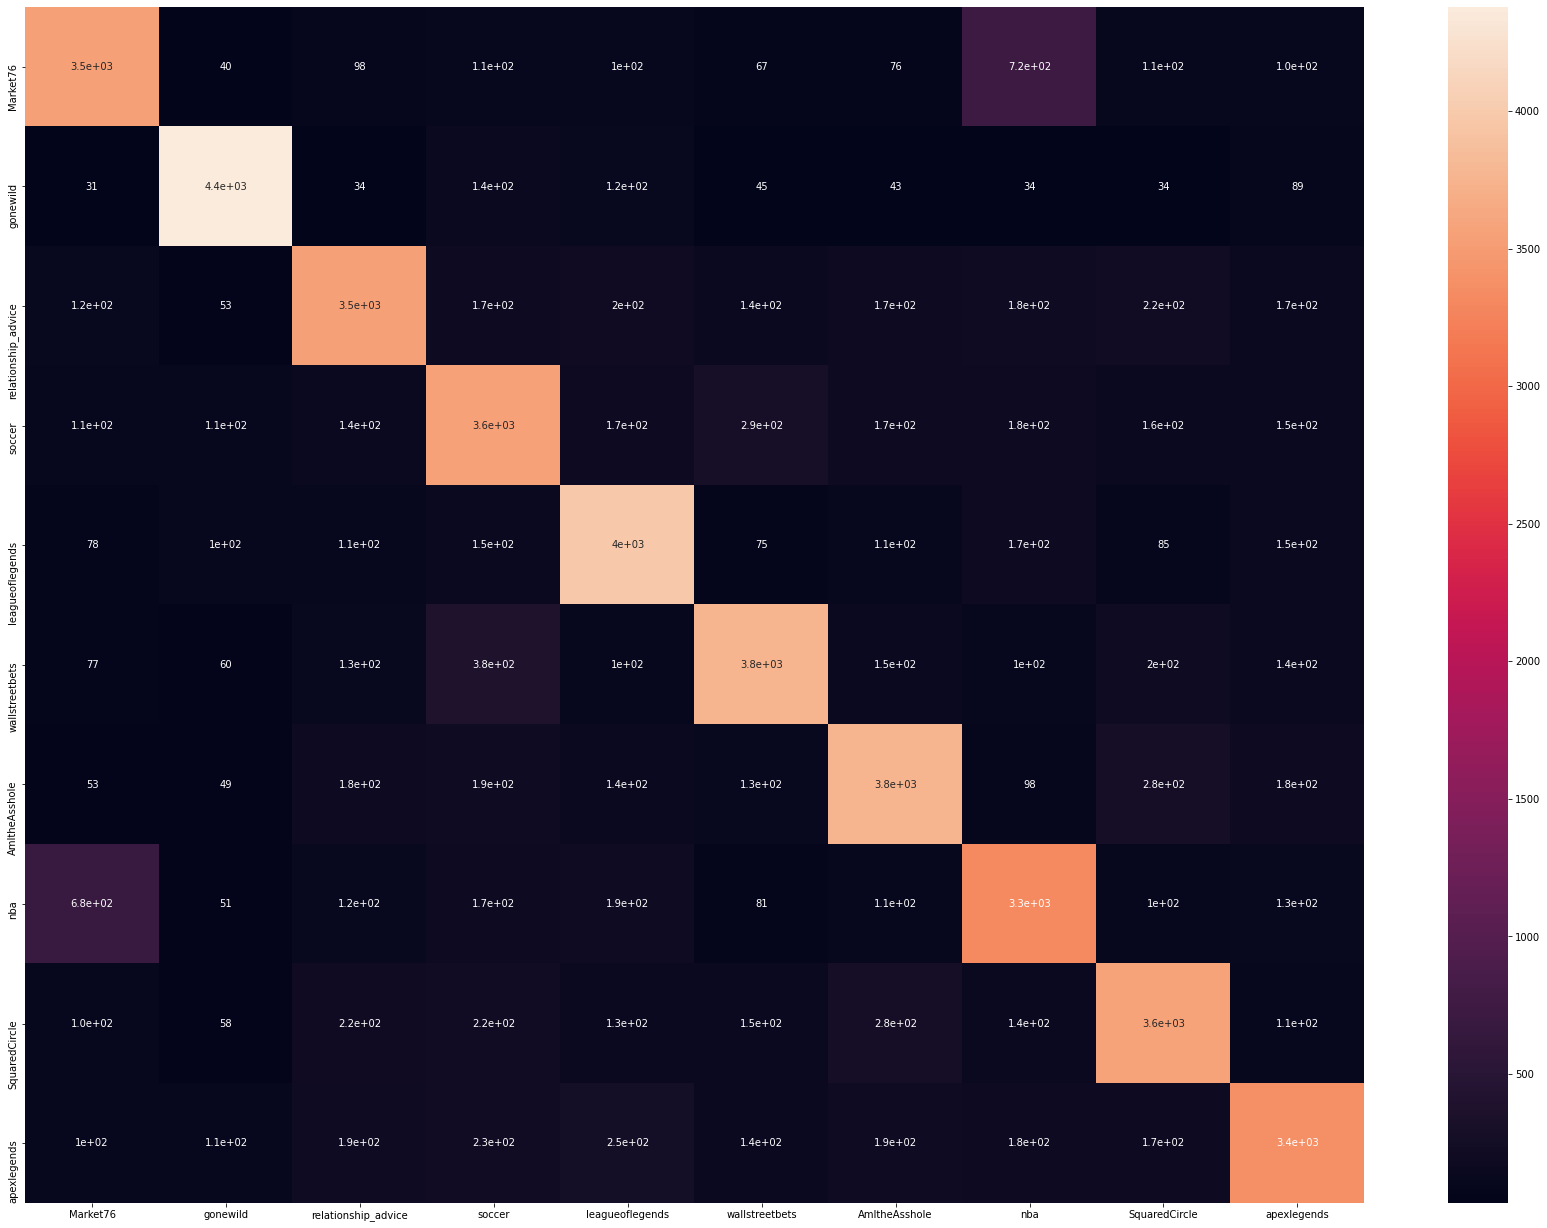

In [25]:
y_pred = model.predict(X_test)

matrix = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))


df_cm = pd.DataFrame(matrix, index = [i for i in top10],
                  columns = [i for i in top10])
plt.figure(figsize = (30,22))
sn.heatmap(df_cm, annot=True)

## worst 10 classified  subreddit

In [26]:
bot10 = ['funny','todayilearned','pics','AskReddit','gameofthrones',
      'memes','worldnews','The_Donald','unpopularopinion','ChapoTrapHouse']

df2 = df[df['subreddit'].isin(bot10)]

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df2['tokens'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = tokenizer.texts_to_sequences(df2['tokens'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

Y = pd.get_dummies(df2['subreddit']).values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 50)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Found 106111 unique tokens.
(200000, 250) (200000, 10)
(50000, 250) (50000, 10)


In [27]:
# Padding the data samples to a maximum review length in words
max_words = 250
# Building the CNN Model
model = Sequential()
model.add(Embedding(5000, 32, input_length=max_words)) 
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 32)           1600000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 250, 32)           3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 125, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               1000250   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2510      
Total params: 2,605,864
Trainable params: 2,605,864
Non-trainable params: 0
____________________________________________

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 50)

model.fit(X_train, Y_train, 
          epochs = 20, 
          batch_size= 256, verbose=2)


scores = model.evaluate(X_test, Y_test, verbose=0)

#get accuracy on test set
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
782/782 - 39s - loss: 0.2810 - accuracy: 0.3025
Epoch 2/20
782/782 - 38s - loss: 0.2329 - accuracy: 0.4622
Epoch 3/20
782/782 - 41s - loss: 0.2057 - accuracy: 0.5439
Epoch 4/20
782/782 - 40s - loss: 0.1843 - accuracy: 0.6000
Epoch 5/20
782/782 - 39s - loss: 0.1663 - accuracy: 0.6437
Epoch 6/20
782/782 - 39s - loss: 0.1509 - accuracy: 0.6803
Epoch 7/20
782/782 - 39s - loss: 0.1371 - accuracy: 0.7126
Epoch 8/20
782/782 - 38s - loss: 0.1250 - accuracy: 0.7414
Epoch 9/20
782/782 - 40s - loss: 0.1146 - accuracy: 0.7647
Epoch 10/20
782/782 - 41s - loss: 0.1058 - accuracy: 0.7835
Epoch 11/20
782/782 - 39s - loss: 0.0980 - accuracy: 0.8002
Epoch 12/20
782/782 - 40s - loss: 0.0915 - accuracy: 0.8141
Epoch 13/20
782/782 - 38s - loss: 0.0857 - accuracy: 0.8265
Epoch 14/20
782/782 - 37s - loss: 0.0806 - accuracy: 0.8374
Epoch 15/20
782/782 - 39s - loss: 0.0761 - accuracy: 0.8465
Epoch 16/20
782/782 - 41s - loss: 0.0725 - accuracy: 0.8543
Epoch 17/20
782/782 - 39s - loss: 0.0686 - accura

<AxesSubplot:>

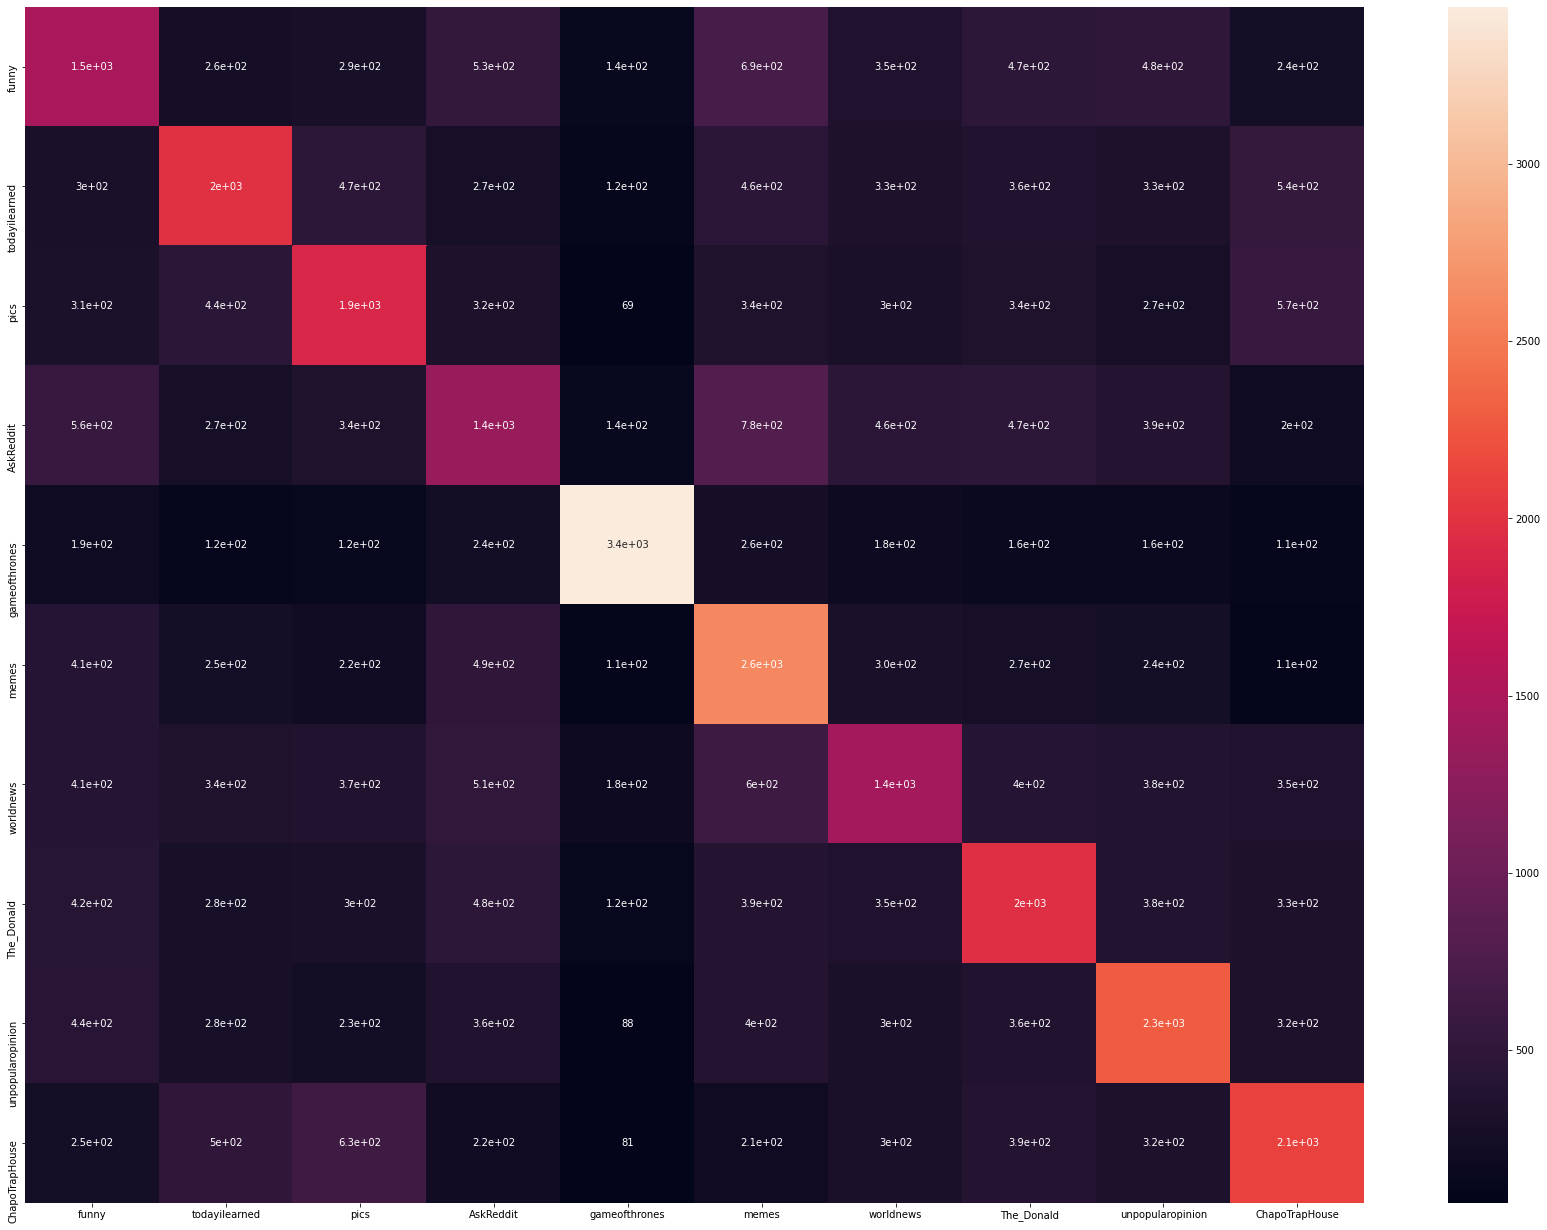

In [30]:
y_pred = model.predict(X_test)

matrix = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))


df_cm = pd.DataFrame(matrix, index = [i for i in bot10],
                  columns = [i for i in bot10])
plt.figure(figsize = (30,22))
sn.heatmap(df_cm, annot=True)